In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tennis = pd.read_csv('atp_tennis.csv')

In [5]:
tennis['Winner'].value_counts()

Djokovic N.      552
Nadal R.         467
Federer R.       361
Cilic M.         331
Murray A.        324
                ... 
Benchetrit E.      1
Puetz T.           1
Sorensen L.        1
Davydenko P.       1
Wu T.L.            1
Name: Winner, Length: 527, dtype: int64

In [6]:
tennis['Tournament'].value_counts()

Australian Open                1386
US Open                        1268
French Open                    1265
Wimbledon                      1142
BNP Paribas Open                945
                               ... 
Singapore Open                   26
Forte Village Sardegna Open      26
Gijon Open                       26
Hungarian Open                   26
Zhuhai Open                      25
Name: Tournament, Length: 141, dtype: int64

In [20]:
tennis['Surface'].value_counts()

Hard     14832
Clay      7714
Grass     2816
Name: Surface, dtype: int64

In [11]:
winners = tennis.groupby('Winner').size().reset_index(name='wins')

top_five = winners.sort_values(by='wins', ascending=False).head(5)

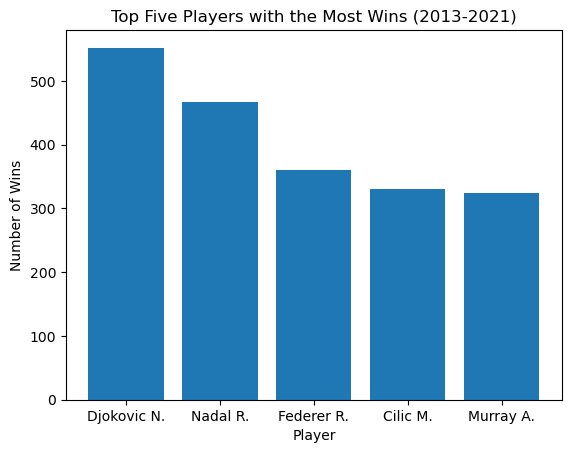

In [16]:
# Create a bar chart of the top five players
plt.bar(top_five['Winner'], top_five['wins'])

# Add labels and a title to the chart
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Top Five Players with the Most Wins (2013-2021)')

# Show the chart
plt.show()

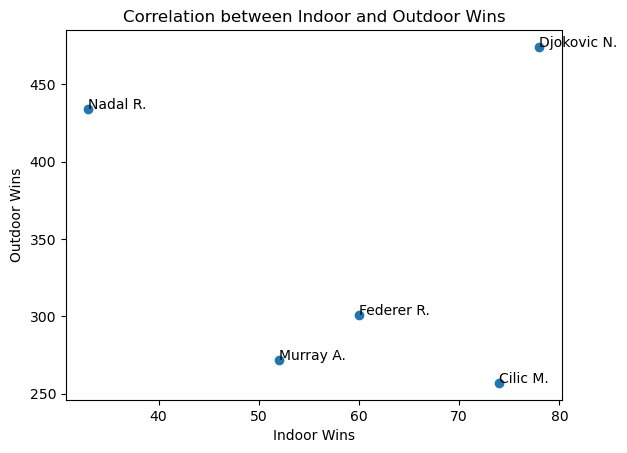

In [25]:
# Group the data by winner and whether the match was indoor or outdoor
winners_surface = tennis.groupby(['Winner', 'Court']).size().reset_index(name='wins')

# Pivot the data to create a new DataFrame with one row per player and columns for indoor and outdoor wins
pivoted = winners_surface.pivot(index='Winner', columns='Court', values='wins').fillna(0)
top_five = pivoted.sum(axis=1).sort_values(ascending=False).head(5)

# Filter the pivoted DataFrame to include only the top 5 players
pivoted_top_five = pivoted.loc[top_five.index]
# Create a scatter plot of the data
plt.scatter(pivoted_top_five['Indoor'], pivoted_top_five['Outdoor'])
# Add labels and a title to the chart
plt.xlabel('Indoor Wins')
plt.ylabel('Outdoor Wins')
plt.title('Correlation between Indoor and Outdoor Wins')


for player, x, y in zip(pivoted_top_five.index, pivoted_top_five['Indoor'], pivoted_top_five['Outdoor']):
    plt.annotate(player, (x, y))
# Show the chart
plt.show()